In [2]:
import geopandas as gpd
import pandas as pd

In [48]:
gdf = gpd.read_file('../data/occupation du sol/namur_perc.geojson')
gdf.head()

new_df = gdf[["cd_sector", "tx_sector_descr_fr", "HISTO_NODATA","HISTO_1","HISTO_2", "geometry"]]
new_df["total"] = new_df["HISTO_NODATA"] + new_df["HISTO_1"] + new_df["HISTO_2"]
new_df['perc_herbe'] = new_df["HISTO_1"] / new_df["total"] * 100
new_df['perc_arbre'] = new_df["HISTO_2"] / new_df["total"] * 100
new_df['perc_ver'] = new_df["perc_arbre"] + new_df['perc_herbe']
new_df["CD_SECTOR"] = new_df["cd_sector"]
final = new_df[["CD_SECTOR", "perc_herbe", "perc_arbre", "perc_ver"]]
final




,cd_sector,tx_sector_descr_fr,HISTO_NODATA,HISTO_1,HISTO_2,geometry
0,92094A001,HOTEL DE VILLE,219267,5673,1203,"POLYGON ((4.86784 50.46498, 4.86685 50.46512, ..."
1,92094A011,NaN,179660,12568,2746,"POLYGON ((4.87125 50.46904, 4.87059 50.46914, ..."
2,92094A02-,LE GROGNON,100246,6012,3938,"POLYGON ((4.87167 50.46178, 4.87072 50.46206, ..."
3,92094A031,PARC - FACULTES,104801,22654,3093,"POLYGON ((4.86189 50.46570, 4.86182 50.46588, ..."
4,92094A04-,PIED DE LA CITADELLE,92363,31518,5664,"POLYGON ((4.85578 50.46440, 4.85560 50.46460, ..."
...,...,...,...,...,...,...
202,92094Y00-,ERPENT-CENTRE,240464,358084,33129,"POLYGON ((4.90686 50.45582, 4.90640 50.45609, ..."
203,92094Y012,BOIS WILLIAM - BASEILLES,334164,684661,63252,"POLYGON ((4.90310 50.44324, 4.90285 50.44341, ..."
204,92094Y022,TOURNOIRE - GRAND-TIGE,58602,447067,28603,"POLYGON ((4.90686 50.45582, 4.90725 50.45623, ..."
205,92094Y091,RUISSEAU D'ERPENT,189756,2022262,481254,"POLYGON ((4.92015 50.46453, 4.91999 50.46491, ..."


In [4]:
cities = ["namur", "liege", "charleroi", "mons"]
every = pd.DataFrame()
for city in cities:
    gdf = gpd.read_file(f'../data/occupation du sol/{city}_perc.geojson')
    new_df = gdf[["cd_sector", "tx_sector_descr_fr", "HISTO_NODATA","HISTO_1","HISTO_2", "geometry"]]
    
    new_df["total"] = new_df["HISTO_NODATA"] + new_df["HISTO_1"] + new_df["HISTO_2"]
    new_df['perc_herbe'] = new_df["HISTO_1"] / new_df["total"] * 100
    new_df['perc_arbre'] = new_df["HISTO_2"] / new_df["total"] * 100
    new_df['perc_ver'] = new_df["perc_arbre"] + new_df['perc_herbe']
    new_df["CD_SECTOR"] = new_df["cd_sector"]
    new_df["city"] = city
    final = new_df[["CD_SECTOR", "perc_herbe", "perc_arbre", "perc_ver","city"]]
    final

    gdf = gpd.read_file(f'../data/rev_fixed/{city}_temp_fixed.json')
    print(gdf.shape)
    test = gdf.merge(final, on="CD_SECTOR")
    test.to_file(f"../data/perc_verd/{city}_verdure.json", driver="GeoJSON")
    print(test)
    every = pd.concat([every, test], ignore_index=True)


every.to_file(f"../data/final_data_Used/every_city_infos.json", driver="GeoJSON")


# new_df.to_file(f"../data/occupation du sol/percentage.geojson", driver="GeoJSON")

C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users

(10833, 12)
       centroid_lon  centroid_lat  raster_value_x  \
0          4.903903     50.530722       32.127342   
1          4.903903     50.529580       32.660553   
2          4.905700     50.529580       32.008850   
3          4.911090     50.529580       32.097721   
4          4.900310     50.528438       31.579092   
...             ...           ...             ...   
10828      4.878750     50.392331       28.710262   
10829      4.880547     50.392331       26.515100   
10830      4.876954     50.391186       31.097536   
10831      4.878750     50.391186       29.618389   
10832      4.880547     50.391186       27.219702   

                  tx_sector_descr_fr  REVENU_MOYEN  REVENU_MEDIAN  NOMBRE_HAB  \
0                     BELLE VUE-NORD       22341.0        16764.0         141   
1                     BELLE VUE-NORD       22341.0        16764.0         141   
2                     BELLE VUE-NORD       22341.0        16764.0         141   
3                     BELLE

C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users

(4224, 12)
      centroid_lon  centroid_lat  raster_value_x tx_sector_descr_fr  \
0         5.541707     50.684648       33.296066           DUPIREUX   
1         5.543504     50.684648       32.811886           DUPIREUX   
2         5.545300     50.684648       32.543659           DUPIREUX   
3         5.547097     50.684648       32.587578           DUPIREUX   
4         5.539910     50.683509       33.822441           DUPIREUX   
...            ...           ...             ...                ...   
4219      5.559673     50.562689       28.076517    BOIS SAINT-JEAN   
4220      5.561470     50.562689       26.811005    BOIS SAINT-JEAN   
4221      5.563267     50.562689       28.062582    BOIS SAINT-JEAN   
4222      5.552487     50.561548       27.651836    BOIS SAINT-JEAN   
4223      5.554283     50.561548       25.870071    BOIS SAINT-JEAN   

      REVENU_MOYEN  REVENU_MEDIAN  NOMBRE_HAB  DENSITE_PAR_HECTARE  \
0          25136.0        21175.0         720            58.021888

C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users

(6289, 12)
      centroid_lon  centroid_lat  raster_value_x      tx_sector_descr_fr  \
0         4.456542     50.491876       37.191654                 ROBESSE   
1         4.458339     50.491876       35.840679                 ROBESSE   
2         4.454745     50.490733       35.779156                 ROBESSE   
3         4.456542     50.490733       38.166214                 ROBESSE   
4         4.458339     50.490733       34.960114                 ROBESSE   
...            ...           ...             ...                     ...   
6284      4.442169     50.354518       27.581984  LA BRUYERE (RESIDENCE)   
6285      4.434983     50.353372       28.818548  LA BRUYERE (RESIDENCE)   
6286      4.436779     50.353372       27.806435  LA BRUYERE (RESIDENCE)   
6287      4.438576     50.353372       27.294870  LA BRUYERE (RESIDENCE)   
6288      4.440372     50.353372       27.907883  LA BRUYERE (RESIDENCE)   

      REVENU_MOYEN  REVENU_MEDIAN  NOMBRE_HAB  DENSITE_PAR_HECTARE  \
0     

C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users

(8977, 12)
      centroid_lon  centroid_lat  raster_value_x tx_sector_descr_fr  \
0         3.975045     50.512446       32.705406  SHAPE - MAISIERES   
1         3.976842     50.512446       31.941669  SHAPE - MAISIERES   
2         3.975045     50.511303       31.412132  SHAPE - MAISIERES   
3         3.976842     50.511303       32.329571  SHAPE - MAISIERES   
4         3.978638     50.511303       35.407730  SHAPE - MAISIERES   
...            ...           ...             ...                ...   
8972      3.966062     50.393477       33.208603       CHEVAL BLANC   
8973      3.967859     50.393477       32.513741       CHEVAL BLANC   
8974      3.969655     50.393477       32.754612       CHEVAL BLANC   
8975      3.966062     50.392331       33.345524       CHEVAL BLANC   
8976      3.967859     50.392331       33.566692       CHEVAL BLANC   

      REVENU_MOYEN  REVENU_MEDIAN  NOMBRE_HAB  DENSITE_PAR_HECTARE  \
0          31398.0        25987.0        1005            64.371576

In [50]:
gdf = gpd.read_file('../data/centroids/namur_sel_centroid.json')
print(gdf.shape)

test = gdf.merge(final, on="CD_SECTOR")

test.to_file(f"../data/perc_verd/namur_verdure.json", driver="GeoJSON")
test

(10805, 12)


,centroid_lon,centroid_lat,raster_value_x,tx_sector_descr_fr,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,ms_area_ha,CD_SECTOR,raster_value_y,geometry,perc_herbe,perc_arbre,perc_ver
0,4.903903,50.530722,32.127342,BELLE VUE-NORD,22341.0,16764.0,141,98.724711,98.723108,92094N280,31.914742,POINT (4.90390 50.53072),83.283378,3.743156,87.026534
1,4.903903,50.529580,32.660553,BELLE VUE-NORD,22341.0,16764.0,141,98.724711,98.723108,92094N280,31.914742,POINT (4.90390 50.52958),83.283378,3.743156,87.026534
2,4.905700,50.529580,32.008850,BELLE VUE-NORD,22341.0,16764.0,141,98.724711,98.723108,92094N280,31.914742,POINT (4.90570 50.52958),83.283378,3.743156,87.026534
3,4.911090,50.529580,32.097721,BELLE VUE-NORD,22341.0,16764.0,141,98.724711,98.723108,92094N280,31.914742,POINT (4.91109 50.52958),83.283378,3.743156,87.026534
4,4.900310,50.528438,31.579092,BELLE VUE-NORD,22341.0,16764.0,141,98.724711,98.723108,92094N280,31.914742,POINT (4.90031 50.52844),83.283378,3.743156,87.026534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10800,4.878750,50.392331,28.710262,BOREUVILLE-CHAUSSEE DE DINANT,24688.0,18291.0,91,33.606191,33.605645,92094C18-,29.177250,POINT (4.87875 50.39233),25.776119,34.522694,60.298813
10801,4.880547,50.392331,26.515100,BOREUVILLE-CHAUSSEE DE DINANT,24688.0,18291.0,91,33.606191,33.605645,92094C18-,29.177250,POINT (4.88055 50.39233),25.776119,34.522694,60.298813
10802,4.876954,50.391186,31.097536,BOREUVILLE-CHAUSSEE DE DINANT,24688.0,18291.0,91,33.606191,33.605645,92094C18-,29.177250,POINT (4.87695 50.39119),25.776119,34.522694,60.298813
10803,4.878750,50.391186,29.618389,BOREUVILLE-CHAUSSEE DE DINANT,24688.0,18291.0,91,33.606191,33.605645,92094C18-,29.177250,POINT (4.87875 50.39119),25.776119,34.522694,60.298813


<Axes: >

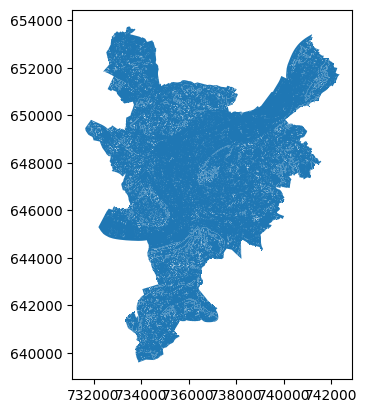

In [13]:
gdf = gpd.read_file('../data/occupation du sol/geo_occ.geojson')
gdf.plot(aspect=1)


In [ ]:
processing.run("gdal:cliprasterbymasklayer", {'INPUT':'C:/Users/Décrypte/Documents/GitHub/open nc/occupation du sol/WAL_OCS_IA__2020.tif','MASK':'C:/Users/Décrypte/Documents/GitHub/ilots-de-chaleur/data/secteurs/tournai_secteur.geojson|geometrytype=Polygon|uniqueGeometryType=yes','SOURCE_CRS':None,'TARGET_CRS':None,'TARGET_EXTENT':'559071.729100000,644475.403800000,625650.435800000,682651.066100000 [EPSG:3812]','NODATA':None,'ALPHA_BAND':False,'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':False,'SET_RESOLUTION':False,'X_RESOLUTION':None,'Y_RESOLUTION':None,'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'','OUTPUT':'TEMPORARY_OUTPUT'})